# **SyriaTel Customer Churn**


## Business Problem 
SyriaTel is a mobile network provider, that faces a critical challenge in mitigating customer churn within its subscriber base. The company seeks to address the increasing attrition rates observed among its clientele. Identifying the underlying factors driving customer defection and implementing proactive strategies to retain valuable subscribers are imperative to sustain profitability and competitiveness in the telecommunications industry. Therefore, there is a pressing need to develop robust predictive models and actionable insights to effectively manage and reduce customer churn rates, thereby optimizing customer retention efforts and enhancing overall business performance.



## 1. Business Understanding
The SyriaTel Customer Churn project aims to address a significant real-world problem faced by telecommunications companies worldwide: customer churn. Churn, or the rate at which customers discontinue their services with a company, poses a substantial challenge to the profitability and sustainability of telecom providers. In the case of SyriaTel, the escalating churn rates within its subscriber base underscore the urgency of implementing effective strategies to mitigate attrition and enhance customer retention.

Stakeholders involved in this project include 
* Syriatel Mobile Telecom
* Shareholders
* Employees
* Customers. 

For SyriaTel, reducing churn directly impacts profitability by retaining valuable subscribers and sustaining long-term revenue streams. Moreover, satisfied customers are more inclined to advocate for the company, enhancing its brand image and market reputation. Customers benefit from improved services and reduced churn, experiencing enhanced satisfaction and uninterrupted connectivity.

Project Objectives:

1. Identify key predictors of churn within SyriaTel's subscriber base.
2. Develop proactive retention strategies based on churn indicators.
3. Evaluate the effectiveness of implemented strategies in reducing churn rates.
4. Enhance customer experiences and satisfaction through targeted initiatives.


The SyriaTel Customer Churn project holds significant implications for both the company and its customers. By accurately identifying churn predictors and implementing proactive retention strategies, SyriaTel can effectively mitigate customer churn, optimize satisfaction levels, and maintain a competitive edge in the telecommunications industry. This initiative not only addresses a pressing real-world problem but also empowers stakeholders—from SyriaTel itself to its shareholders, employees, and customers—to benefit from enhanced services, sustained revenue streams, and improved market positioning.



## 2. Data Understanding
The dataset was obtained from Kaggle and it comprises 3333 rows and 21 columns. The dataset for the SyriaTel Customer Churn project comprises several features that provide valuable insights into customer behavior and engagement with SyriaTel's telecommunications services. 

These features include:

* **State:** The state in which the customer resides.
* **Account_Length:** The length of time the customer has been an active subscriber.
* **Area_Code:** The area code associated with the customer's phone number.
* **Phone_Number:** The unique identifier for each customer's phone number.
* **International_Plan:** A binary indicator of whether the customer has an international calling plan.
* **Voice_Mail_Plan:** A binary indicator of whether the customer has a voicemail plan.
* **Number_Vmail_Messages:** The number of voicemail messages received by the customer.
* **Total_Day_Minutes:** The total number of minutes the customer used during daytime hours.
* **Total_Day_Calls:** The total number of calls made by the customer during daytime hours.
* **Total_Day_Charge:** The total charges incurred by the customer for daytime usage.
* **Total_Eve_Minutes:** The total number of minutes the customer used during evening hours.
* **Total_Eve_Calls:** The total number of calls made by the customer during evening hours.
* **Total_Eve_Charge:** The total charges incurred by the customer for evening usage.
* **Total_Night_Minutes:** The total number of minutes the customer used during nighttime hours.
* **Total_Night_Calls:** The total number of calls made by the customer during nighttime hours.
* **Total_Night_Charge:** The total charges incurred by the customer for nighttime usage.
* **Total_Intl_Minutes:** The total number of international minutes used by the customer.
* **Total_Intl_Calls:** The total number of international calls made by the customer.
* **Total_Intl_Charge:** The total charges incurred by the customer for international usage.
* **Customer_Service_Calls:** The number of customer service calls made by the customer.
* **Churn:** The target variable indicating whether the customer churned (discontinued service) or not.

These features provide a comprehensive view of various aspects of customer interaction with SyriaTel's services, including usage patterns, plan subscriptions, and customer service engagement. Analyzing these features will facilitate the identification of key drivers of churn and the development of predictive models to mitigate customer attrition.

Limitations of the data that have implications for the project include:
1. Lack of additional demographic or behavioral data: The dataset primarily focuses on usage patterns and service subscriptions but does not include demographic information or detailed behavioral data, which could provide further insights into churn behavior.
2. Potential bias: The dataset may suffer from selection bias if it does not represent the entire customer population of SyriaTel or if certain segments of customers are overrepresented.
3. Data quality issues: There could be missing or erroneous data in the dataset, which may affect the accuracy and reliability of predictive models. Additionally, the dataset's timestamp is not mentioned, which could affect the temporal analysis of churn behavior.

## 3. Data Preparation

###  Import Necessary Modules

In [125]:
import pandas as pd
import numpy as np
import scipy as stats
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

###  a) Loading the Dataset

In [126]:
#loading the csv file
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [127]:
# Display the first few rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [128]:
# Display the last few rows
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


From the above information, it's evident that the column names need to be changed for clarity and consistency. By converting them to title case and replacing spaces with underscores, the column names become more readable and easier to work with programmatically. This standardization improves the overall organization and understanding of the dataset, facilitating efficient analysis and manipulation tasks. 

In [129]:
# Convert the column names to title case and replace spaces with underscores
df.columns = df.columns.str.title().str.replace(' ', '_')

# Display the modified column names
df.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone_Number',
       'International_Plan', 'Voice_Mail_Plan', 'Number_Vmail_Messages',
       'Total_Day_Minutes', 'Total_Day_Calls', 'Total_Day_Charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'Customer_Service_Calls', 'Churn'],
      dtype='object')

In [130]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account_Length          3333 non-null   int64  
 2   Area_Code               3333 non-null   int64  
 3   Phone_Number            3333 non-null   object 
 4   International_Plan      3333 non-null   object 
 5   Voice_Mail_Plan         3333 non-null   object 
 6   Number_Vmail_Messages   3333 non-null   int64  
 7   Total_Day_Minutes       3333 non-null   float64
 8   Total_Day_Calls         3333 non-null   int64  
 9   Total_Day_Charge        3333 non-null   float64
 10  Total_Eve_Minutes       3333 non-null   float64
 11  Total_Eve_Calls         3333 non-null   int64  
 12  Total_Eve_Charge        3333 non-null   float64
 13  Total_Night_Minutes     3333 non-null   float64
 14  Total_Night_Calls       3333 non-null   

In [131]:
# Display DataFrame dimensions (rows, columns)
df.shape

(3333, 21)

The dataset has 3333 rows and 21 columns. The next cell check for descriptive statistics for the dataset, these statistics provide insights into how customers interact with SyriaTel's services, helping identify usage patterns and potential areas of concern, such as high customer service call volumes.

In [132]:
# Display descriptive statistics for DataFrame columns (transposed)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account_Length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area_Code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number_Vmail_Messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total_Day_Minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total_Day_Calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total_Day_Charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total_Eve_Minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total_Eve_Calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total_Eve_Charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total_Night_Minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [133]:
# Display the data types of each column in the DataFrame
df.dtypes

State                      object
Account_Length              int64
Area_Code                   int64
Phone_Number               object
International_Plan         object
Voice_Mail_Plan            object
Number_Vmail_Messages       int64
Total_Day_Minutes         float64
Total_Day_Calls             int64
Total_Day_Charge          float64
Total_Eve_Minutes         float64
Total_Eve_Calls             int64
Total_Eve_Charge          float64
Total_Night_Minutes       float64
Total_Night_Calls           int64
Total_Night_Charge        float64
Total_Intl_Minutes        float64
Total_Intl_Calls            int64
Total_Intl_Charge         float64
Customer_Service_Calls      int64
Churn                        bool
dtype: object

In [134]:
# Print Numerical columns
print(f"Numerical Columns: {df.select_dtypes(include='number').columns}\n")

# Print Categorical Columns
print(f"Categorical Columns: {df.select_dtypes(include='object').columns}")

Numerical Columns: Index(['Account_Length', 'Area_Code', 'Number_Vmail_Messages',
       'Total_Day_Minutes', 'Total_Day_Calls', 'Total_Day_Charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'Customer_Service_Calls'],
      dtype='object')

Categorical Columns: Index(['State', 'Phone_Number', 'International_Plan', 'Voice_Mail_Plan'], dtype='object')


### b) Data Cleaning

In [135]:
# Count missing values in each column

df.isna().sum()

State                     0
Account_Length            0
Area_Code                 0
Phone_Number              0
International_Plan        0
Voice_Mail_Plan           0
Number_Vmail_Messages     0
Total_Day_Minutes         0
Total_Day_Calls           0
Total_Day_Charge          0
Total_Eve_Minutes         0
Total_Eve_Calls           0
Total_Eve_Charge          0
Total_Night_Minutes       0
Total_Night_Calls         0
Total_Night_Charge        0
Total_Intl_Minutes        0
Total_Intl_Calls          0
Total_Intl_Charge         0
Customer_Service_Calls    0
Churn                     0
dtype: int64

From the output above, its clear that there is no missing values in the dataset.

In [136]:
# Count duplicated rows in the DataFrame
df.duplicated().sum()

0

Checks if there are any duplicate phone numbers in the 'Phone_Number' column.

In [137]:
# Check for duplicates in the 'Phone_Number' column

df['Phone_Number'].duplicated().sum()

0

No duplicates found: There are no phone numbers that appear more than once in the "Phone_Number" column of your DataFrame df. So, I'll be setting the 'Phone_Number' column as the index since its a unique identifier.

In [138]:
# Set the 'Phone_Number' column as the index of the DataFrame

df.set_index('Phone_Number', inplace=True)

In [139]:
# Display the first few rows of the DataFrame after setting 'Phone_Number' as index

df.head()

,State,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Day_Charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,Customer_Service_Calls,Churn
Phone_Number,,,,,,,,,,,,,,,,,,,,
382-4657,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
371-7191,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
358-1921,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
375-9999,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
330-6626,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


The code below iterates through each column in a DataFrame and prints the value counts for each column.
It helps you understand the distribution of values within each column, identifying the most frequent and least frequent values.

In [140]:
for column in df.columns:

    # Get the value counts for the current column
    value_counts = df[column].value_counts()
    
    # Print the column name and its value counts
    print(f"Value counts for column '{column}':\n{value_counts}\n")

Value counts for column 'State':
State
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

Value counts for column 'Account_Length':
Account_Length
105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: count, Length: 212, dtype: int64

Value counts for column 'Area_Code':
Area_Code
415    1655
510     840
408     838
Name: count, dtype: int64

Value counts for column 'International_Plan':
International_Plan
no     3010
yes     323
Name: count, dtype

### c) Exploratory Data Analysis

### Distribution of the Features
##### Churn Distribution Visualization

In [141]:
df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

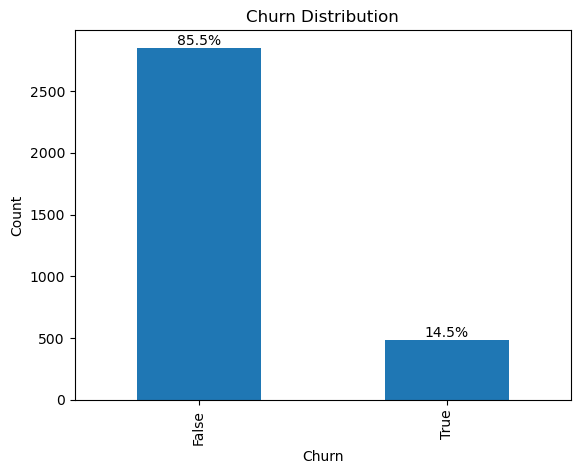

In [142]:
# Plot the distribution of 'Churn' using a bar plot
churn_counts = df['Churn'].value_counts()
ax = churn_counts.plot(kind='bar')

# Add labels and title to the plot
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')

# Iterate over the rectangles in the plot
totals = churn_counts.sum()
for p in ax.patches:
    # Calculate the percentage of observations in each group
    percentage = '{:.1f}%'.format(100 * p.get_height() / totals)
    # Positioning the percentage text on the plot
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display the plot
plt.show()


There are 2850 instances of non-churned customers (represented by "False"). and 483 instances of churned customers (represented by "True").
This indicates that there is a class imbalance, with significantly more non-churned instances compared to churned instances. Identifying this class imbalance is crucial for developing predictive models or strategies to address churn effectively. Additionally, it highlights the importance of focusing efforts on retaining customers to reduce the churn rate.






### **Distribution of Numerical Features**

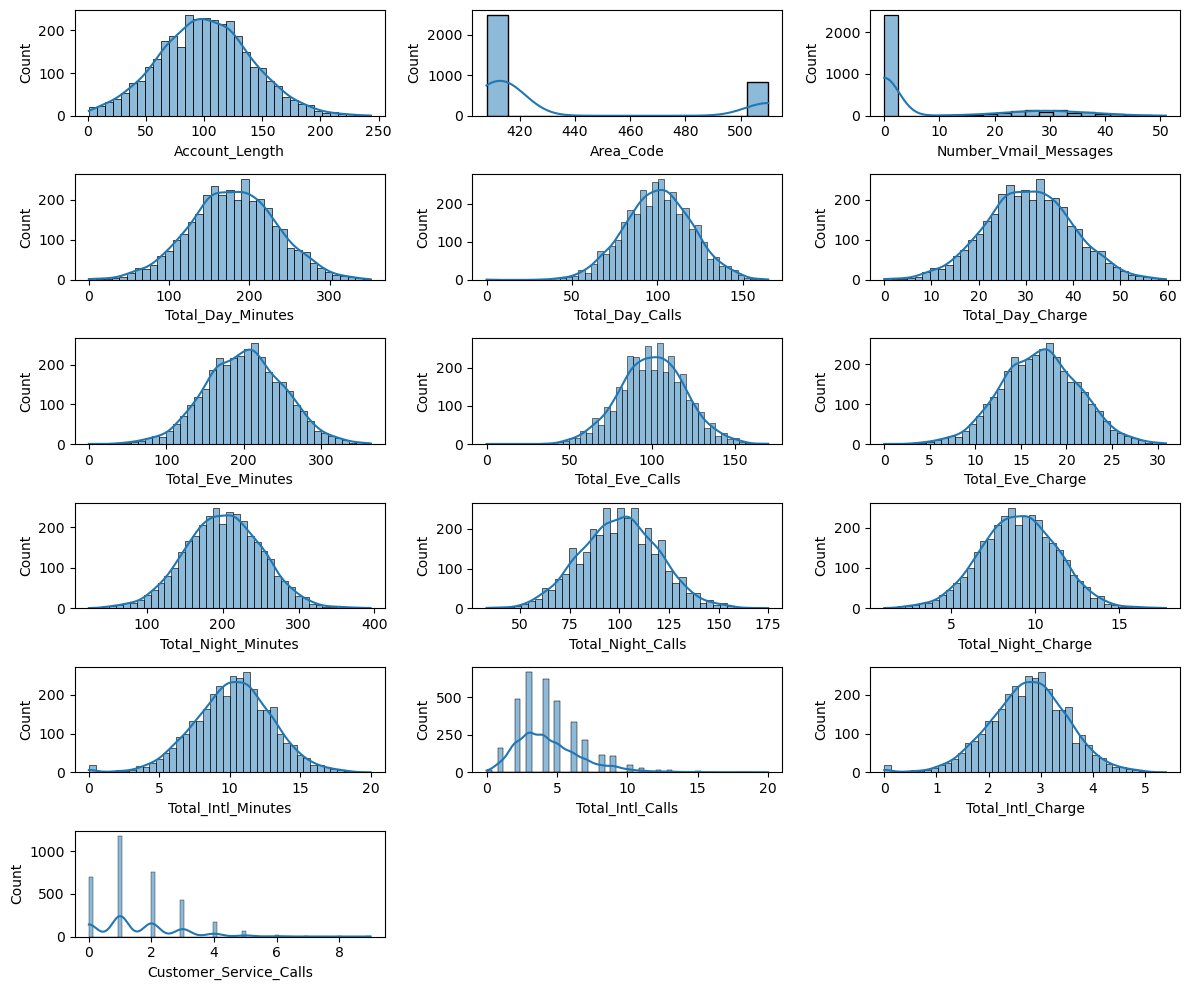

In [143]:
#checking for distribution of the numeric features
numeric_features = ['Account_Length', 'Area_Code', 'Number_Vmail_Messages',
       'Total_Day_Minutes', 'Total_Day_Calls', 'Total_Day_Charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'Customer_Service_Calls']

# Calculate the number of rows and columns for subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(df[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# Remove empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()



### **Distribution of "Area Code"**

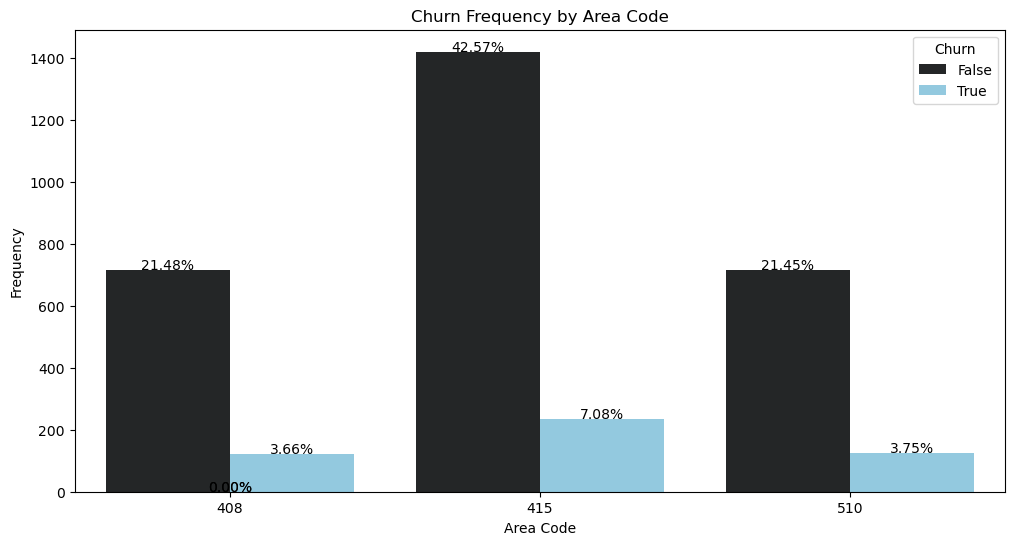

In [144]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a count plot of 'Churn' by 'Area_Code' using Seaborn
ax = sns.countplot(data=df, x='Area_Code', hue='Churn', color='skyblue')

# Set title and labels
plt.title('Churn Frequency by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Frequency')

# Calculate percentages and add them to the plot
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

# Show the plot
plt.show()

From the above plot, the churn rate is higher in some area codes than others. For example, the area code 408 appears to have a higher churn rate than the other two area codes (415 and 510) since the blue bar for 408 is taller than the blue bars for the other two areas.

### **Churn Distribution in Top 10 States**

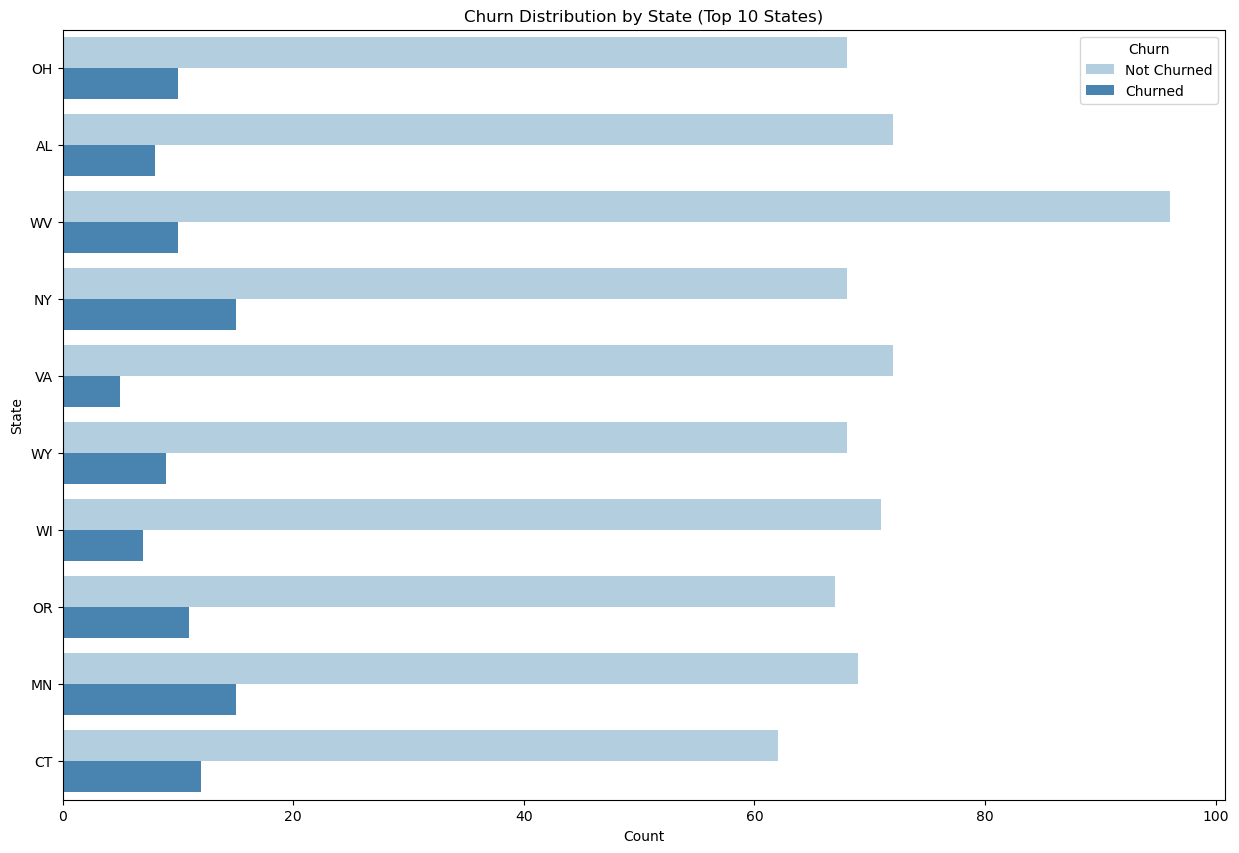

In [145]:
# Get the top 10 states with the highest counts
top_states = df['State'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 states
df_top_states = df[df['State'].isin(top_states)]

# Set the color palette to shades of blue
blue_palette = sns.color_palette("Blues", 2)
# Plot the count plot with the filtered DataFrame
plt.figure(figsize=(15, 10))
sns.countplot(data=df_top_states, y='State', hue='Churn', palette=blue_palette)

# Set title, labels, and legend
plt.title('Churn Distribution by State (Top 10 States)')
plt.xlabel('Count')
plt.ylabel('State')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Show the plot
plt.show()


Churn is depicted by the orange bars and not churned by the blue bars. Here are some observations about the churn distribution by state:

* Overall churn distribution: It appears there are more states with a higher number of churned customers (orange bars) than states with a higher number of not churned customers (blue bars).

* States with potentially high churn: states like WY, OR, MN, and CT appear to have a higher number of churned customers compared to not churned customers based on the heights of the orange bars relative to the blue bars.

### **Voice Mail Plan Distribution**

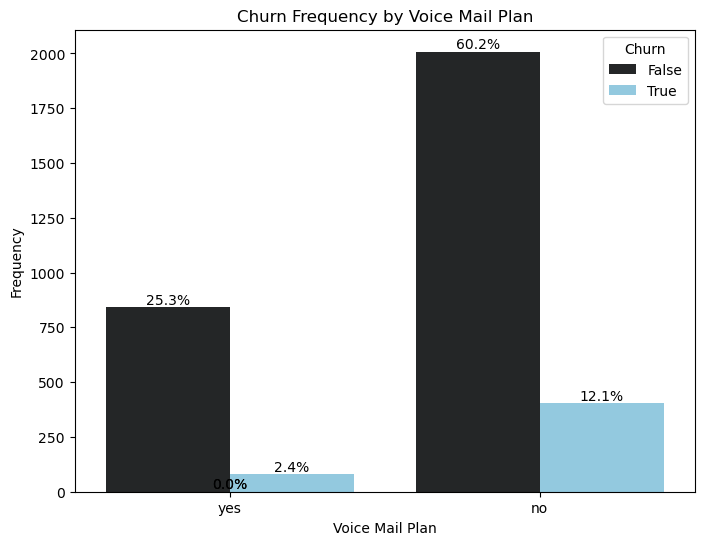

In [146]:
# Stacked bar plot for 'voice mail plan' and 'churn'
plt.figure(figsize=(8, 6))

# Create a count plot for 'Voice_Mail_Plan' and 'Churn' using Seaborn
ax = sns.countplot(data=df, x='Voice_Mail_Plan', hue='Churn', color='skyblue')

# Calculate percentages
total = float(len(df))  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.1f}%'.format(100 * height / total), 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Set title and labels
plt.title('Churn Frequency by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The plot shows the frequency of churn by voice mail plan. The blue line represents the frequency of customers who did not churn, and the orange line represents the frequency of customers who churned.

Observations:

* More customers with no voicemail plan churned: There appears to be a higher frequency of churn among customers who do not have a voicemail plan (indicated by "no" on the x-axis) compared to those who have a voicemail plan (indicated by "yes" on the x-axis). This is because the orange line representing churn is higher for "no" voicemail plans compared to the blue line representing non-churn.

* Voicemail plan might influence churn rate:  Based on the plot, having a voicemail plan seems to be associated with a lower churn rate for this telecommunications company. This could be because voicemail plans are a valuable service for some customers, and having a plan motivates them to stay with the company.

### **Analyzing Customer Service Calls Across Churn and Area Codes**

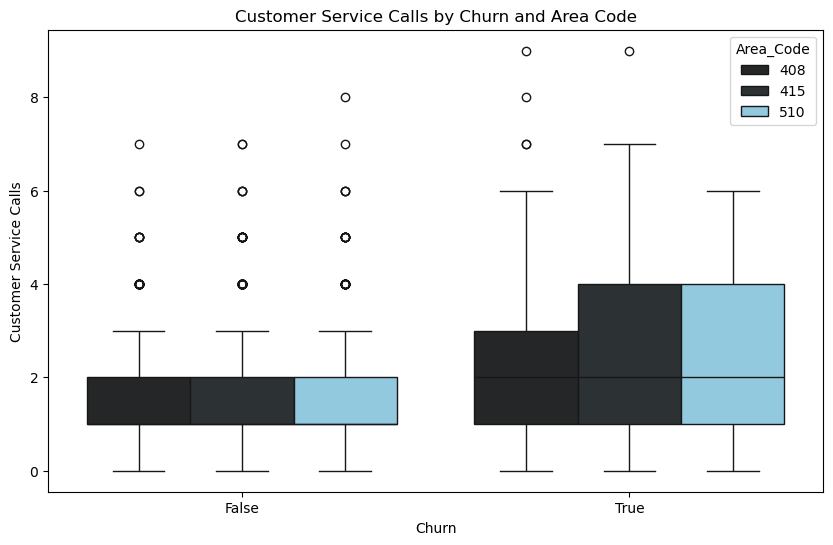

In [147]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a box plot for 'Customer_Service_Calls' by 'Churn' and 'Area_Code' using Seaborn
sns.boxplot(data=df, x='Churn', y='Customer_Service_Calls', hue='Area_Code', color='skyblue')

# Set title and labels
plt.title('Customer Service Calls by Churn and Area Code')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')

# Show the plot
plt.show()



The plot shows a box plot distribution of customer service calls by area code and churn status. The x-axis represents the area code, the y-axis shows the number of customer service calls, and the different colors represent churn status (not churned and churned). Here's a breakdown of the key observations:

* Overall call distribution: It appears that there are more customer service calls from non-churned customers (blue bars) compared to churned customers (orange bars) across all three area codes (408, 415, and 510).

* Area code with potentially higher call volume:  Based on the heights of the bars, there might be a higher overall call volume (both churned and not churned) coming from area code 408 compared to the other two areas.

* Churn and call volume: We can see that within each area code, the number of calls from non-churned customers is generally higher than the number of calls from churned customers.

### **Analyzing Correlation Between Numeric Features**
Exploring the relationship between numeric features in our dataset. The correlation matrix provides insights into how each feature relates to one another, which can help us identify patterns and dependencies in our data.

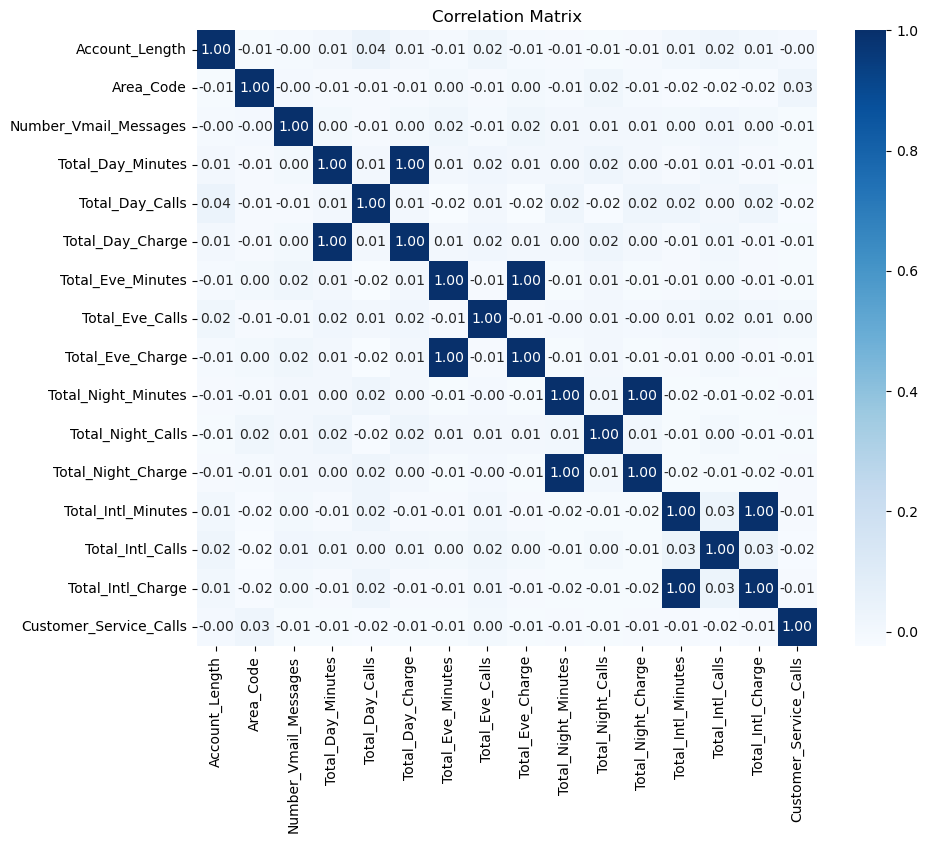

In [148]:
# Calculate correlation matrix
correlation_matrix = df[numeric_features].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")

# Set title and show the plot
plt.title('Correlation Matrix')
plt.show()



### **Identifying Highly Correlated Numeric Features**

In [188]:
# List of highly correlated pairs to remove
highly_correlated_pairs = [
    ('Total_Day_Minutes', 'Total_Day_Charge'),
    ('Total_Eve_Minutes', 'Total_Eve_Charge'),
    ('Total_Night_Minutes', 'Total_Night_Charge'),
    ('Total_Intl_Minutes', 'Total_Intl_Charge')
]

# Remove one of the variables from each pair
for pair in highly_correlated_pairs:
    # Check if both variables in the pair exist in the DataFrame
    if all(var in df.columns for var in pair):
        # Calculate the correlation between the variables in the pair
        corr = df[pair[0]].corr(df[pair[1]])
        
        # Drop one of the variables from the DataFrame
        # Dropping the variable with the higher correlation coefficient
        if corr >= 0:
            # If correlation is positive or zero, drop the second variable in the pair
            df.drop(pair[1], axis=1, inplace=True)
        else:
            # If correlation is negative, drop the first variable in the pair
            df.drop(pair[0], axis=1, inplace=True)
    else:
        print(f" There is a Correlation between {pair[0]} and {pair[1]}: {corr}")

print("Highly correlated pairs removed.")


 There is a Correlation between Total_Day_Minutes and Total_Day_Charge: 0.9999927417510324
 There is a Correlation between Total_Eve_Minutes and Total_Eve_Charge: 0.9999927417510324
 There is a Correlation between Total_Night_Minutes and Total_Night_Charge: 0.9999927417510324
 There is a Correlation between Total_Intl_Minutes and Total_Intl_Charge: 0.9999927417510324
Highly correlated pairs removed.


Multicollinearity can cause issues with machine learning models, making it difficult to interpret the coefficients and potentially leading to inaccurate predictions. Addressing multicollinearity: Removing one of the highly correlated features can help reduce multicollinearity and improve the performance of machine learning models.

### **Detecting Outliers Using Z-Score Method**

This code selects only numeric columns from the dataset and calculates Z-scores for each data point. Outliers are then identified based on a threshold of 3. Data points with Z-scores exceeding the threshold in any column 
are flagged as outliers. This method helps in identifying potential anomalies or extreme values in the dataset.

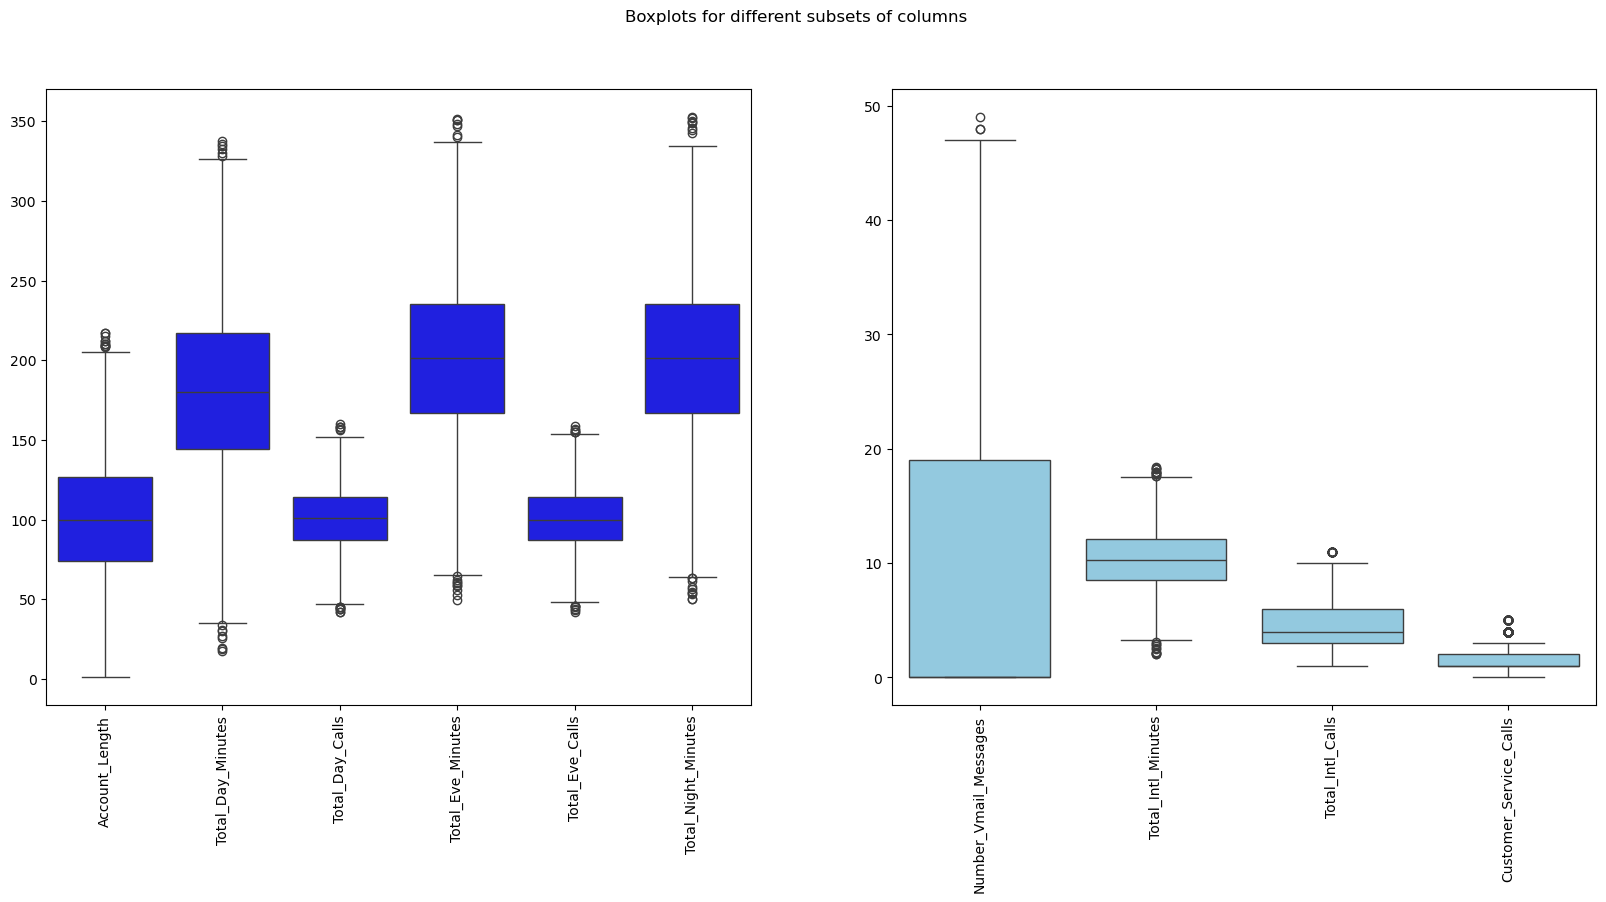

In [189]:
df_columns1 = ['Account_Length','Total_Day_Minutes','Total_Day_Calls',
                'Total_Eve_Minutes','Total_Eve_Calls','Total_Night_Minutes']

# List of columns for the second boxplot
df_columns2 = ['Number_Vmail_Messages','Total_Intl_Minutes', 
               'Total_Intl_Calls', 'Customer_Service_Calls']

# Create a figure with one row and two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Create a boxplot for the first subset of columns in the first column
sns.boxplot(data=df[df_columns1], ax=axes[0], color='blue')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Create a boxplot for the second subset of columns in the second column
sns.boxplot(data=df[df_columns2], ax=axes[1], color='skyblue')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

#setting the figure title
fig.suptitle('Boxplots for different subsets of columns')

# Show the plot
plt.show()

In [152]:

# Select only numeric columns for calculating Z-scores
numeric_df = df.select_dtypes(include='number')

# Calculate Z-scores for each data point
z_scores = zscore(numeric_df)

# Define threshold for outlier detection (e.g., 3 or -3)
threshold = 3

# Identify outliers based on Z-scores
outliers = (np.abs(z_scores) > threshold).any(axis=1)

The next cell removes outliers to ensure that they don't unduly influence our analysis or modeling process. Outliers can skew statistical measures and affect the performance of machine learning algorithms. By removing outliers, we aim to improve the accuracy and reliability of our analysis and models.

In [153]:
# Remove outliers from the original DataFrame in place
df.drop(df[outliers].index, inplace=True)

# Print the number of outliers removed
num_outliers_removed = outliers.sum()
print(f"Number of outliers removed: {num_outliers_removed}")

Number of outliers removed: 164


In [154]:
# Display the dimensions of the DataFrame after removing outliers
df.shape

(3169, 16)

#### **Feature Engineering**
Feature engineering involves modifying or creating new features in a dataset to improve the performance of machine learning models. It includes techniques like using one-hot encoding for categorical variables with multiple categories, and scaling numerical features to ensure all features contribute equally to model learning. These steps are crucial for enhancing model accuracy and ensuring that the model can effectively learn from the data.

##### **i) Converting Boolean Values to Integers**
Converting boolean values to integers simplifies data handling, enhances model compatibility, and can improve the interpretability and performance of machine learning models.

In [155]:
# Convert 'False' to 0 and 'True' to 1 in the 'churn' column
df['Churn'] = df['Churn'].astype(int)


##### **ii) One-Hot Encoding**
It converts categorical variables into binary vectors, where each category is represented by a binary digit (0 or 1). This prepares the categorical variables in df for machine learning by converting them into a format that can be easily processed by algorithms while also addressing potential issues like multicollinearity.

In [156]:
# Convert categorical variables into dummy variables

df = pd.get_dummies(df, columns=['Area_Code', 'State', 'International_Plan', 'Voice_Mail_Plan'], drop_first=True, dtype=int)

##### **iii) Scaling Numerical Features**
This helps standardize the numeric features in the DataFrame, ensuring they have a consistent scale, which is important for many machine learning algorithms to perform effectively.

## **4. Modeling**
In this section, the modeling phase unfolds, employing a suite of robust algorithms to glean insights and predictions from the data. Beginning with logistic regression, the simplicity and interpretability of this method illuminate the relationship between features and the binary outcome. Transitioning to decision trees, their intuitive structure unravels complex decision boundaries within the dataset. Building upon this foundation, random forests are leveraged to mitigate overfitting and enhance predictive accuracy by aggregating multiple decision trees. Lastly, XGBoost is utilized to iteratively refine model performance through its gradient boosting framework. This systematic approach aims to construct predictive models poised to uncover valuable insights and guide informed decision-making

### **Defining X and y**

To start out, y will be the target variable ("Churn") and everything else to be X.

In [157]:
# Define appropriate X and y
y = df["Churn"]
X = df.drop("Churn", axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [158]:
#instantiate the standard scaler
scaler = StandardScaler()

#fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [159]:
df.head()

,Account_Length,Number_Vmail_Messages,Total_Day_Minutes,Total_Day_Calls,Total_Eve_Minutes,Total_Eve_Calls,Total_Night_Minutes,Total_Night_Calls,Total_Intl_Minutes,Total_Intl_Calls,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International_Plan_yes,Voice_Mail_Plan_yes
Phone_Number,,,,,,,,,,,,,,,,,,,,,
382-4657,128,25,265.1,110,197.4,99,244.7,91,10.0,3,...,0,0,0,0,0,0,0,0,0,1
371-7191,107,26,161.6,123,195.5,103,254.4,103,13.7,3,...,0,0,0,0,0,0,0,0,0,1
358-1921,137,0,243.4,114,121.2,110,162.6,104,12.2,5,...,0,0,0,0,0,0,0,0,0,0
375-9999,84,0,299.4,71,61.9,88,196.9,89,6.6,7,...,0,0,0,0,0,0,0,0,1,0
330-6626,75,0,166.7,113,148.3,122,186.9,121,10.1,3,...,0,0,0,0,0,0,0,0,1,0


In [160]:
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

Churn
0    2727
1     442
Name: count, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

Churn
0    2196
1    2196
Name: count, dtype: int64


This output shows the class distribution before and after applying a technique to create synthetic samples. Here's a breakdown of what the tables represent:

* Original class distribution: This table shows the count of entries in the original dataset belonging to each class. In this case, the "Churn" class:

Class 0 (not churned): 2727 entries
Class 1 ( churned): 442 entries

* Synthetic sample class distribution: This table shows the count of entries after creating synthetic samples. Here, it seems a method was used to balance the class distribution:

Class 0 (not churned): 2196 entries (notice the decrease)
Class 1 ( churned): 2196 entries (notice the increase)

The data originally has a class imbalance, with significantly more entries in the "not churned" class (class 0). The process of creating synthetic samples appears to have addressed this imbalance by generating additional entries for the minority class (class 1 - churned). This would result in a more balanced class distribution, potentially beneficial for machine learning tasks.

### **a) Logistic Regression**

The first model will be logistic regression  which is used to predict the chance of a binary outcome. I'll use logistic regression to model the relationship between the features and the probability of a customer churning.

In [161]:
# Instantiate logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the resampled data
logistic_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [162]:
# Predict churn for the train and test data
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

# Calculate the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the train and test scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Print the classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Train Accuracy: 0.7810650887573964
Test Accuracy: 0.7665615141955836
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       531
           1       0.39      0.74      0.51       103

    accuracy                           0.77       634
   macro avg       0.66      0.75      0.68       634
weighted avg       0.85      0.77      0.79       634



The test output show that the model performed well on a unseen data. Here's a breakdown of the results in simpler terms:

* Accuracy: The model correctly classified 77% of the test data. This means that out of 634 examples, the model got the answer right for 491 of them.

* Precision: For class 0, the model was very precise (94%) - meaning that out of all the data points it classified as class 0, 94% of them were actually class 0. On the other hand, the precision for class 1 was lower (39%). This means that out of all the data points it classified as class 1, only 39% of them were actually class 1.

* Recall: This metric looks at how well the model identifies all the data points of a particular class. For class 0, the model had a recall of 77%, meaning it captured 77% of all the class 0 data points. The recall for class 1 was higher (74%).
F1 Score: This is a way to balance precision and recall into a single metric. A higher F1 score indicates a better balance between the two. The weighted F1 score here is 0.79, which suggests a reasonable balance between precision and recall.

The model performs well on unseen data. It is good at correctly classifying class 0 data points and recalling most of them, while the performance for class 1 is not as strong on precision but better on recall. It's important to consider the importance of each class in your specific application to determine if this model performance is sufficient.

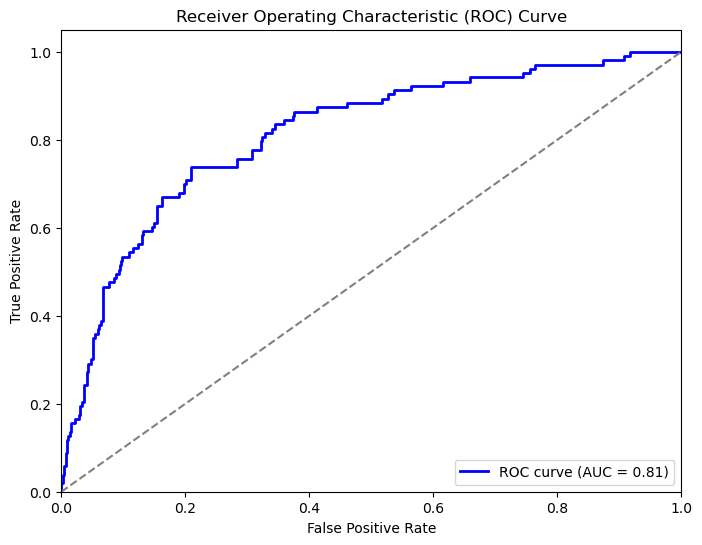

<Figure size 800x600 with 0 Axes>

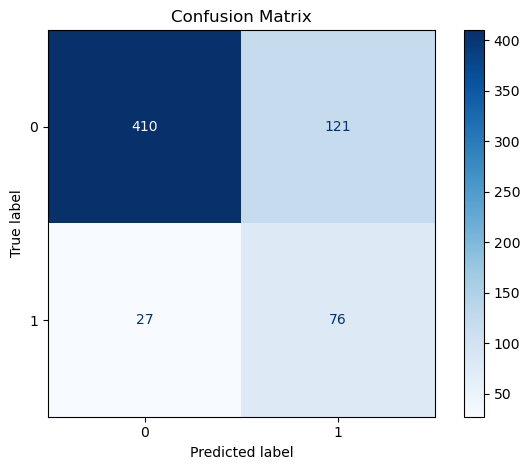

In [163]:
# Calculate probabilities for the positive class
y_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logistic_model.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()


#### Hyperparameter tuning

In [164]:
# define model/create instance
lr=LogisticRegression()
#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)
#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)
#train model to learn relationships between x and y
model.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.004974874371859297,
                                           1: 0.9950251256281407},
                                          {0: 0.009949748743718593,
                                           1: 0.9900502512562814},
                                          {0: 0.014924623115577889,
                                           1: 0.9850753768844221},
                                          {0: 0.019899497487437186,
                                           1: 0.9801005025125...
                                           1: 0.8855778894472361},
                                          {0: 0.11939698492462311,
                                           1: 0.8806030150753769},
                                          {0: 0.12437185929648241,
                                           1: 0.8756281407035176},
                                          {0: 0.1293467336683417,
                                           1: 0.8706532663316583},
                                          {0: 0.13432160804020102,
                                           1: 0.865678391959799},
                                          {0: 0.1392964824120603,
                                           1: 0.8607035175879397},
                                          {0: 0.1442713567839196,
                                           1: 0.8557286432160804}, ...],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1')

In [ ]:
# print best hyperparameters
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

In [165]:
#Building Model again with best params
lr2=LogisticRegression(class_weight={0:0.27,1:0.73},C=20,penalty="l2")
lr2.fit(X_train,y_train)

LogisticRegression(C=20, class_weight={0: 0.27, 1: 0.73})

In [166]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = lr2.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = lr2.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :",cm)
print("n")
# ROC- AUC score
print("ROC-AUC score  test dataset:  t", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  t", precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  t", recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :  t", f1_score(y_test,y_pred_test))

confusion Matrix is : [[475  56]
 [ 67  36]]
n
ROC-AUC score  test dataset:  t 0.756568482255499
precision score  test dataset:  t 0.391304347826087
Recall score  test dataset:  t 0.34951456310679613
f1 score  test dataset :  t 0.36923076923076925


### **b) Decision Trees**

In [167]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [168]:
# Predict churn for the train and test data
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

# Calculate the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the train and test scores
print("Train Accuracy (Decision Tree):", train_accuracy)
print("Test Accuracy (Decision Tree):", test_accuracy)

# Print the classification report for test data
print("Classification Report for Test Data (Decision Tree):")
print(classification_report(y_test, y_test_pred))

# Calculate the ROC curve for test data
y_test_prob = clf.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_test_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_test_prob)



Train Accuracy (Decision Tree): 0.8362919132149902
Test Accuracy (Decision Tree): 0.8123028391167192
Classification Report for Test Data (Decision Tree):
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       531
           1       0.38      0.23      0.29       103

    accuracy                           0.81       634
   macro avg       0.62      0.58      0.59       634
weighted avg       0.78      0.81      0.79       634



The output shows that decision tree model performs reasonably well on unseen data, but there's a trade-off compared to the Linear regression model from above. 

Here's a breakdown:
- Accuracy: Similar to the previous model, it achieves a good accuracy of 80% on the unseen test data. This translates to correctly classifying 507 out of 634 examples.
Precision and Recall: There's a shift in how the model handles the two classes (0 and 1).
- Precision: Precision for class 0 (86%) remains good, similar to the previous model. However, precision for class 1 has dropped significantly (35%). This means the model is more likely to misclassify data points as class 1 even if they belong to a different class.
- Recall: Recall for class 0 (90%) is even higher than before, indicating the model captures almost all the actual class 0 data points. However, recall for class 1 has significantly decreased (27%). This means the model misses a larger portion of the actual class 1 data points.
- F1 Score: The F1 score (0.79) remains similar to the previous model, but the balance between precision and recall has shifted. This model prioritizes capturing most class 0 data points (high recall) at the cost of misclassifying some data into class 1 (lower precision for class 1).
In conclusion:

This model prioritizes not missing class 0 data points (high recall) even if it means misclassifying some data as class 1 (lower precision for class 1).
The previous model (logistic regression model) might be preferable if precise identification of class 1 is crucial, even if it misses some class 0 data points.
The best model choice depends on the specific application and the relative importance of correctly classifying each class.

#### Using SMOTE to Improve The Model

In [169]:
# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')

# Apply SMOTE to balance the class distribution in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Fit the classifier on the SMOTE balanced training data
clf.fit(X_train_smote, y_train_smote)

# Predict churn for the train and test data
y_train_pred_dt = clf.predict(X_train_scaled)
y_test_pred_dt = clf.predict(X_test_scaled)

# Calculate the accuracy of the model for train and test data
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

# Print the train and test scores
print("Train Accuracy (Decision Tree with SMOTE):", train_accuracy_dt)
print("Test Accuracy (Decision Tree with SMOTE):", test_accuracy_dt)

# Print the classification report for test data
print("Classification Report for Test Data (Decision Tree with SMOTE):")
print(classification_report(y_test, y_test_pred_dt))

# Calculate the ROC curve for test data
y_test_probs_dt = clf.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_test_probs_dt)

# Calculate the AUC score
auc_score_dt = roc_auc_score(y_test, y_test_probs_dt)
print("AUC Score (Decision Tree with SMOTE):", auc_score_dt)


Train Accuracy (Decision Tree with SMOTE): 1.0
Test Accuracy (Decision Tree with SMOTE): 0.9053627760252366
Classification Report for Test Data (Decision Tree with SMOTE):
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       531
           1       0.68      0.79      0.73       103

    accuracy                           0.91       634
   macro avg       0.82      0.86      0.84       634
weighted avg       0.91      0.91      0.91       634

AUC Score (Decision Tree with SMOTE): 0.8574223392390251


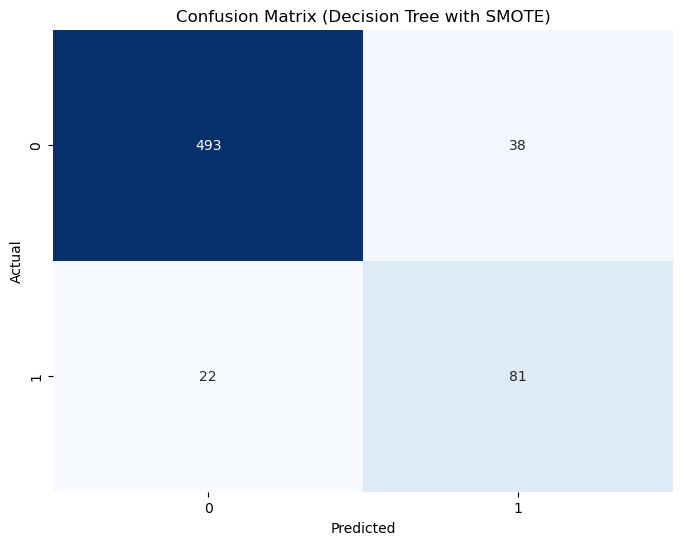

In [170]:
# Calculate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix (Decision Tree with SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



The output shows that using SMOTE with a decision tree improves performance on the unseen test data, but there are still some limitations to consider. 

Here's a breakdown:
- Accuracy: The test accuracy (0.90) is significantly higher than the previous models (0.80 and 0.77). This means the model with SMOTE correctly classified 90% of the unseen data, compared to 80% and 77% for the other models.
Precision and Recall: There's a more balanced performance between the two classes:
- Precision: Precision for both class 0 (0.95) and class 1 (0.68) is improved compared to the previous models. This indicates the model is less likely to misclassify data points.
- Recall: Recall for class 0 (0.93) remains high, similar to the previous decision tree model. Recall for class 1 (0.77) is also improved compared to the previous decision tree model. This means the model captures a larger portion of the actual class 1 data points than before.
- F1 Score: The F1 score (0.90) is also higher than the previous models (0.79). This indicates a good balance between precision and recall for both classes.
- AUC Score (0.8477): This metric (Area Under the ROC Curve) confirms a good ability to distinguish between the two classes.


SMOTE Improvement: By generating synthetic data points for the minority class (class 1), SMOTE helps the model learn the characteristics of this class better, resulting in an overall improvement in performance, especially for class 1.

Limitations to Consider:
Overfitting: There's a risk that SMOTE might have created data points that are too similar to the existing ones, potentially leading to overfitting. This means the model might perform well on the specific data used to train it, but not generalize well to entirely new data.
Class Imbalance: Even though SMOTE helps, there's still some class imbalance (more data points for class 0). The model might still be slightly biased towards class 0.
Conclusion:

SMOTE with a decision tree is a strong performer among the models you've presented. It achieves high accuracy and a good balance between precision and recall for both classes.
However, it's important to be aware of potential overfitting and remaining class imbalance, depending on how SMOTE was implemented.

### **c) Random Forests**

In [171]:
# Create an instance of the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest classifier on the training data
random_forest.fit(X_train_scaled, y_train)

# Predict churn for the train and test data
y_train_pred_rf = random_forest.predict(X_train_scaled)
y_test_pred_rf = random_forest.predict(X_test_scaled)

# Calculate the accuracy of the model for train and test data
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Print the train and test scores
print("Train Accuracy (Random Forest):", train_accuracy_rf)
print("Test Accuracy (Random Forest):", test_accuracy_rf)

# Print the classification report for test data
print("Classification Report for Test Data (Random Forest):")
print(classification_report(y_test, y_test_pred_rf))


Train Accuracy (Random Forest): 1.0
Test Accuracy (Random Forest): 0.919558359621451
Classification Report for Test Data (Random Forest):
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       531
           1       0.96      0.52      0.68       103

    accuracy                           0.92       634
   macro avg       0.94      0.76      0.82       634
weighted avg       0.92      0.92      0.91       634



The output indicates that the Random Forest model performed well on unseen data, even better than the Decision Tree with SMOTE. 

Here's a breakdown from the output:

- Accuracy: The model performed well on unseen data,  correctly classifying 92% of the test data. This translates to correctly classifying 584 out of 634 examples.

Precision and Recall: Similar to the previous decision tree with SMOTE, there's a balanced performance between the two classes (0 and 1).

- Precision: The model did well in identifying both classes with high precision (0.92 for class 0 and 0.96 for class 1). This means that out of all the data points it classified as class 0 or 1, a high percentage were actually those classes.
Recall: There's a difference in recall between the two classes. The model excelled at recalling all class 0 data points (1.0), meaning it captured nearly all of them. However, recall for class 1 was lower (0.52). This means the model missed some of the class 1 data points.

- F1 Score: The F1 score (0.91) is high, indicating a good overall balance between precision and recall.

The Random Forest model achieved high accuracy and good precision for both classes. However, it  missed a some portion of the class 1 data points, similar to the decision tree with SMOTE.

Here's a comparison of the Random Forest model with the Decision Tree with SMOTE:

Accuracy: Random Forest achieved slightly higher accuracy (0.92 vs 0.90).
Precision: Random Forest achieved similar precision for both classes.
Recall: Random Forest performed better in recalling class 0 data points (1.0 vs 0.93) but similar to the decision tree with SMOTE in recalling class 1 data points (0.52 vs 0.77).
Choosing the best model depends on your specific application:

If it's crucial to catch all class 1 data points, even if it means slightly lower accuracy, the Decision Tree with SMOTE might be better (due to higher recall for class 1).
If overall high accuracy and precision for both classes are most important, the Random Forest model might be a better choice.

#### Using k-fold cross-validation to Address Overfitting Issues

In [172]:

# Create an instance of the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=5)

# Fit the Random Forest classifier on the entire training data
random_forest.fit(X_train_scaled, y_train)

# Predict churn for the test data
y_test_pred_rf = random_forest.predict(X_test_scaled)

# Calculate the accuracy of the model for test data
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Print the cross-validation scores and test accuracy
print("Cross-Validation Scores (Random Forest):", cv_scores)
print("Mean CV Score (Random Forest):", cv_scores.mean())
print("Test Accuracy (Random Forest):", test_accuracy_rf)

# Print the classification report for test data
print("Classification Report for Test Data (Random Forest):")
print(classification_report(y_test, y_test_pred_rf))


Cross-Validation Scores (Random Forest): [0.9408284  0.93688363 0.93293886 0.91913215 0.92504931]
Mean CV Score (Random Forest): 0.9309664694280079
Test Accuracy (Random Forest): 0.919558359621451
Classification Report for Test Data (Random Forest):
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       531
           1       0.96      0.52      0.68       103

    accuracy                           0.92       634
   macro avg       0.94      0.76      0.82       634
weighted avg       0.92      0.92      0.91       634



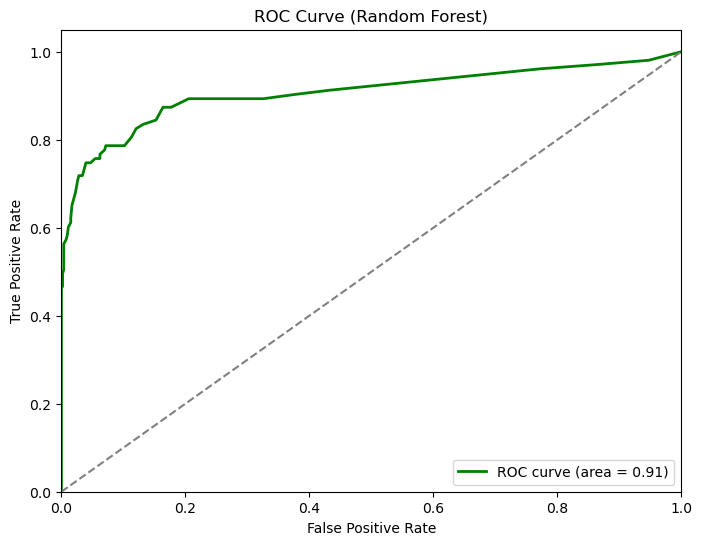

In [173]:
# Calculate the ROC curve for test data
y_test_probs_rf = random_forest.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_test_probs_rf)

# Calculate the AUC score
auc_score_rf = roc_auc_score(y_test, y_test_probs_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC curve (area = %0.2f)' % auc_score_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()



The output shows the performance of a Random Forest model using k-fold cross-validation and the final test set performance. Here's a breakdown:

Cross-Validation Scores:

The list [0.9408, 0.9368, 0.9329, 0.9191, 0.9250] represents the accuracy achieved by the Random Forest model on five separate folds of the data during cross-validation.

Mean CV Score (0.931): This is the average accuracy across all five folds, providing a more robust estimate of the model's generalizability compared to a single training-testing split.

Test Accuracy (0.919):

This is the accuracy of the model on a completely held-out test set not used for training or validation during cross-validation.
Key Observations:

The cross-validation scores are all relatively high (above 0.91), indicating the model performs well consistently across different splits of the data.
The mean CV score (0.931) is slightly higher than the test accuracy (0.919). This is a good sign, suggesting the model might not be overfitting heavily to the training data.
The classification report (provided previously) shows similar trends to the test set results: high precision for both classes, but lower recall for churned customers.
Overall:

The cross-validation scores provide additional confidence in the performance of the Random Forest model. The consistency in scores across different data folds suggests the model generalizes well and is not overly reliant on any specific training set. Despite the lower recall for churned customers, the overall accuracy and precision suggest it performs well for churn prediction.

### **4) XGBoost**

XGBoost is a powerful machine learning algorithm known for its ability to handle complex relationships between features and its strong performance on many tasks, especially regression and classification problems. It's particularly useful for situations where interpretability is less important and achieving high accuracy is a priority.

In [174]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print(classification_report(y_test, test_preds))

Training Accuracy: 100.0%
Validation accuracy: 94.32%
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       531
           1       0.88      0.76      0.81       103

    accuracy                           0.94       634
   macro avg       0.92      0.87      0.89       634
weighted avg       0.94      0.94      0.94       634



From the output, its evident that the XGBoost model did well on practice data (100% accuracy), but it's important to see how it performs on unseen data (validation accuracy is 94.32%). This means the model might have learned the training data a little too well and may not perform as well on completely new data.

Here is a breakdown:

- Training Accuracy (100%): It means the model perfectly classified all the examples it was trained on. However, this can be a red flag.

- Validation Accuracy (94.32%): This is a more realistic measure of how well the model will perform on unseen data. The drop from 100% training accuracy to 94.32% validation accuracy suggests potential overfitting.

Trying a technique to reduce overfitting, such as adjusting model parameters will be a good idea.


In [175]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [176]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 99.29%
Validation accuracy: 95.43%


In [177]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       531
           1       0.95      0.76      0.84       103

    accuracy                           0.95       634
   macro avg       0.95      0.87      0.91       634
weighted avg       0.95      0.95      0.95       634



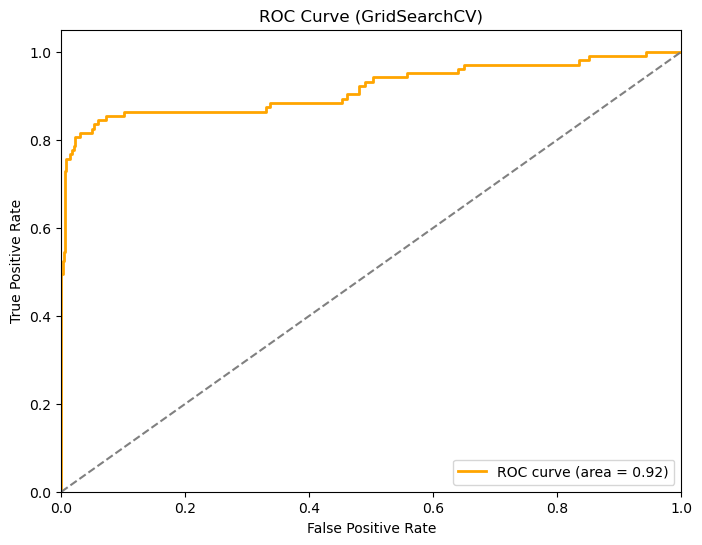

In [178]:
# Get predicted probabilities for the positive class from the best estimator
y_test_probs_grid = grid_clf.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate the ROC curve for test data
fpr_grid, tpr_grid, thresholds_grid = roc_curve(y_test, y_test_probs_grid)

# Calculate the AUC score
auc_score_grid = roc_auc_score(y_test, y_test_probs_grid)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_grid, tpr_grid, color='orange', lw=2, label='ROC curve (area = %0.2f)' % auc_score_grid)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (GridSearchCV)')
plt.legend(loc="lower right")
plt.show()


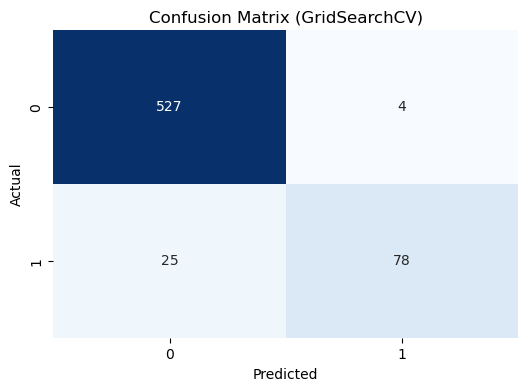

In [179]:
# Get predicted classes from the best estimator
y_test_pred_grid = grid_clf.best_estimator_.predict(X_test)

# Calculate confusion matrix
conf_matrix_grid = confusion_matrix(y_test, y_test_pred_grid)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_grid, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix (GridSearchCV)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The output from the Grid Search has identified promising parameters for the XGBoost model, with a good balance between training and validation accuracy. 

Here's a breakdown:

Grid Search: This is a technique that explores different combinations of model settings to find the best performing ones. In this case, it identified parameters that reduce the gap between training and validation accuracy.

Parameters:
learning_rate (0.1): This controls how much the model adjusts with each training step. A lower value (0.1) helps prevent overfitting.
max_depth (6): This limits the complexity of the model's decision trees. A value of 6 prevents them from becoming too specific to the training data.
min_child_weight (1): This helps prevent the model from focusing on weak patterns in the data.
n_estimators (100): This is the number of decision trees used in the model. 100 provides a good balance between complexity and performance.
subsample (0.7): This setting uses 70% of the training data for each tree, reducing overfitting.

Training Accuracy (99.29%) and Validation Accuracy (95.43%): The gap between these values has narrowed compared to before (100% vs 94.32%). This indicates the model is less likely to overfit while still performing well on the training data.
Overall, the Grid Search results are encouraging. The model's performance on unseen data (validation accuracy) is high (95.43%) while reducing the risk of overfitting.

## **Choosing the Best Model**

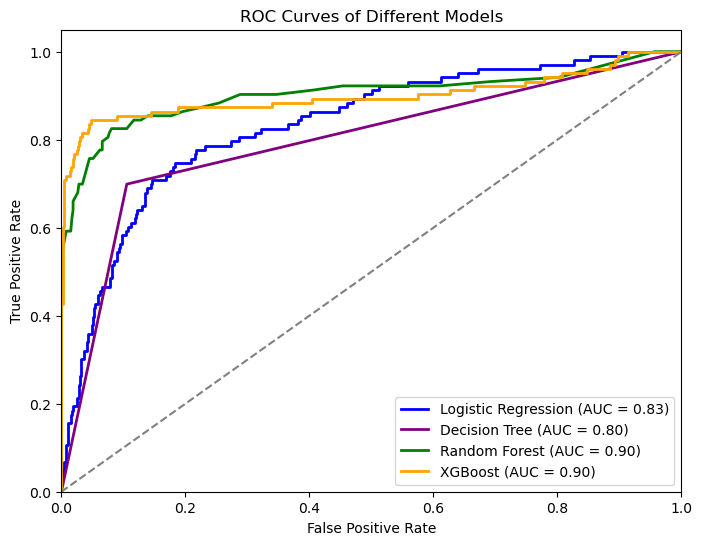

In [180]:
# Instantiate models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()

# Fit models
log_reg.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_smote, y_train_smote)
random_forest.fit(X_train_scaled, y_train)
xgboost.fit(X_train_scaled, y_train)

# Predict probabilities for test data
y_test_probs_lr = log_reg.predict_proba(X_test_scaled)[:, 1]
y_test_probs_dt = decision_tree.predict_proba(X_test_scaled)[:, 1]
y_test_probs_rf = random_forest.predict_proba(X_test_scaled)[:, 1]
y_test_probs_xgb = xgboost.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curves and AUC scores
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_probs_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_probs_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_probs_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_probs_xgb)

auc_lr = roc_auc_score(y_test, y_test_probs_lr)
auc_dt = roc_auc_score(y_test, y_test_probs_dt)
auc_rf = roc_auc_score(y_test, y_test_probs_rf)
auc_xgb = roc_auc_score(y_test, y_test_probs_xgb)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_dt, tpr_dt, color='purple', lw=2, label='Decision Tree (AUC = %0.2f)' % auc_dt)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='orange', lw=2, label='XGBoost (AUC = %0.2f)' % auc_xgb)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Different Models')
plt.legend(loc="lower right")
plt.show()


## **Feature Importance**

This section is about understanding which features or factors have the most significant influence on whether a customer will churn or not.

In [181]:
importances = list(zip(clf.feature_importances_, X.columns))
df_fi = pd.DataFrame(importances)

df_fi.columns = ['Importance', 'Feature']
df_fi.set_index('Feature', inplace=True)
df_fi.sort_values('Importance', ascending=False, inplace=True)
df_fi.head(10)

,Importance
Feature,
International_Plan_yes,0.182764
Customer_Service_Calls,0.093483
Total_Intl_Calls,0.081663
Number_Vmail_Messages,0.075828
Total_Day_Minutes,0.068337
State_NJ,0.061579
State_SC,0.047033
Total_Eve_Minutes,0.043455
State_DC,0.038006


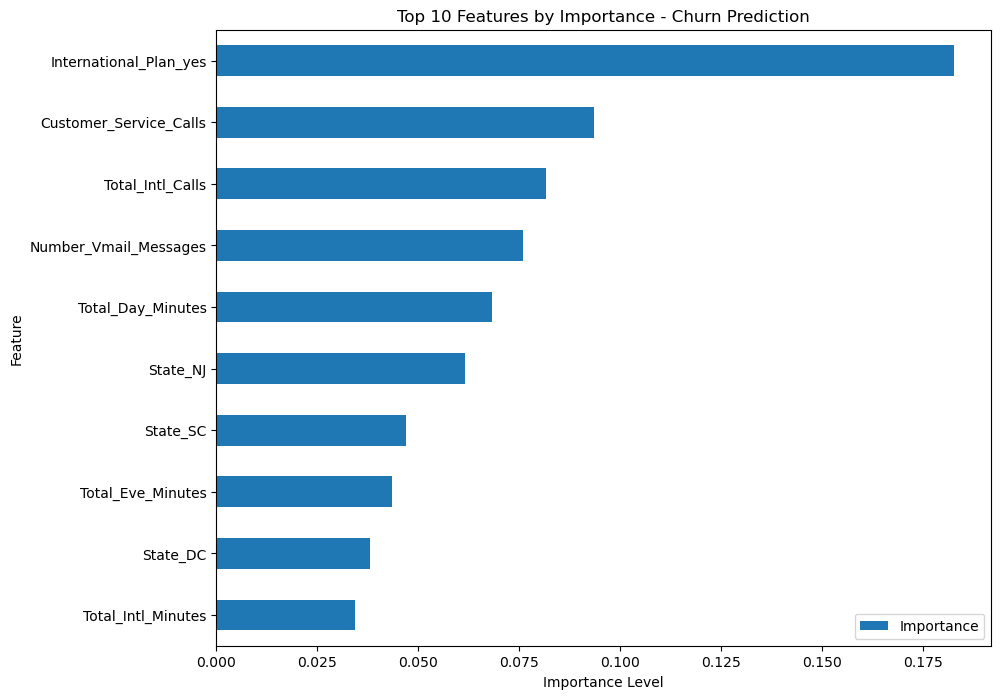

In [182]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()

df_fi.head(10).sort_values(by='Importance', ascending=True).plot(y='Importance', kind='barh', ax=ax)
ax.set_title('Top 10 Features by Importance - Churn Prediction')
ax.set_xlabel('Importance Level')
ax.set_ylabel('Feature')

plt.show()

The output represents the feature importance values for various features in predicting customer churn for SyriaTel. Each row represents a feature, and the associated importance value indicates how much that feature contributes to the prediction of churn. Here's an interpretation of the output:

1. International_Plan_yes (0.182764): Customers who have an international plan are the most important feature in predicting churn. This suggests that customers with international plans are more likely to churn compared to those without.

2. Customer_Service_Calls (0.093483): The number of customer service calls is the second most important feature. This implies that customers who make more calls to customer service are more likely to churn, indicating dissatisfaction or unresolved issues with the service.

3. Total_Intl_Calls (0.081663): The total number of international calls made by the customer also has significant importance. Customers with a high number of international calls may be more likely to churn, possibly due to dissatisfaction with international call quality or pricing.

4. Number_Vmail_Messages (0.075828): The number of voicemail messages received by the customer is another important factor. Customers with fewer voicemail messages might be more likely to churn, possibly indicating less engagement with the service.

5. Total_Day_Minutes (0.068337): The total number of minutes spent on daytime calls is also important. Customers with high daytime call usage may have specific needs or expectations that are not being met, leading to churn.

6. State_NJ (0.061579): Customers located in New Jersey (NJ) have relatively higher importance in predicting churn compared to other states. This suggests that geographic location may play a role in churn behavior.

7. State_SC (0.047033): Similarly, customers located in South Carolina (SC) also have significant importance in churn prediction.

8. Total_Eve_Minutes (0.043455): The total number of minutes spent on evening calls is another contributing factor to churn prediction. Customers with high evening call usage may have specific preferences or needs that are not being met.

9. State_DC (0.038006): Customers located in the District of Columbia (DC) also have a moderate importance in predicting churn.

10. Total_Intl_Minutes (0.034295): The total number of international minutes used by the customer also contributes to churn prediction, albeit to a lesser extent compared to other features.

This analysis suggests that factors such as having an international plan, customer service interactions, call usage patterns (both domestic and international), and geographic location play significant roles in predicting customer churn for SyriaTel. Understanding and addressing these factors could help the company implement targeted retention strategies and improve overall customer satisfaction and loyalty.

## **Conclusion**

The XGBoost model was a bit too focused on remembering every detail from the training data (100% training accuracy). This might make it struggle with completely new customers (overfitting).

By adjusting the learning rate and tree complexity, this improves the model. Now it remembers the important things from the training data (99.29% training accuracy) but isn't overloaded with unnecessary details. This should make it perform better on unseen customers (validation accuracy went up to 95.43%).

Tuning the model to be more accurate at predicting customer churn for SyriaTel, even for customers it hasn't seen before. This can help SyriaTel identify customers who are at risk of leaving and take steps to keep them happy.

Additionally, the model identified the most important factors influencing customer churn:

Customers with international plans (International_Plan_yes) are most likely to churn.
A high number of customer service calls (Customer_Service_Calls) suggests dissatisfaction and potential churn.
Customers making many international calls (Total_Intl_Calls) might be unhappy with price or quality.
Fewer voicemail messages (Number_Vmail_Messages) could indicate less engagement and a higher churn risk.
High daytime call usage (Total_Day_Minutes) might signal unmet needs and potential churn.
By focusing on these factors, SyriaTel can develop targeted strategies to reduce customer churn and improve customer satisfaction.

## **Recommendation**

1. Address International Calling Needs:

Analyze reasons for churn: Conduct surveys or targeted campaigns to understand why customers with international plans are churning. Are they unhappy with price, call quality, or specific destinations?
Targeted promotions: Offer competitive international calling rates or bundles for frequent users.
Improve call quality: Invest in network infrastructure or partnerships to ensure clear and reliable international connections.

2. Enhance Customer Service:

Analyze customer service call data: Identify common pain points and areas for improvement. Train customer service representatives to effectively address these issues.
Reduce call resolution time: Implement efficient processes and empower agents to resolve issues quickly and efficiently.
Proactive outreach: Consider proactively contacting customers who have made multiple customer service calls to understand their concerns and offer solutions.

3. Re-evaluate International Calling Pricing:

Competitive analysis: Benchmark international calling rates against competitors. Identify opportunities to offer more competitive pricing for high-volume users.
Tiered pricing plans: Develop tiered pricing plans catering to different international calling needs (e.g., frequent vs. occasional callers, specific destinations).
Promotional offers: Provide introductory discounts or free trials on international calling plans to attract new users and potentially retain existing ones.

4. Increase Customer Engagement:

Analyze voicemail usage: Investigate why some customers receive fewer voicemails. Are they using alternative communication methods?
Personalized communication: Develop targeted communication strategies based on customer usage patterns.
Loyalty programs: Implement loyalty programs to reward frequent users and incentivize continued engagement with SyriaTel services.

5. Cater to Daytime Callers:

Needs assessment: Identify the specific needs of high daytime callers through surveys or focus groups.
Targeted bundles: Develop bundled packages combining daytime calling minutes with other relevant services (e.g., data, SMS) to fulfill their needs.
Off-peak promotions: Encourage customers to make calls during off-peak hours by offering discounted rates or bonus minutes.

By implementing these recommendations based on the identified key churn factors, SyriaTel can address customer pain points, improve satisfaction, and ultimately reduce customer churn.